In [1]:
%matplotlib inline
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os

matplotlib.style.use('ggplot')

comp_name=socket.gethostname()
if  comp_name == 'Ezequiels-MacBook-Pro.local':
    print 'Computer ' + comp_name
    sys.path.append('/Users/zeke/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/Users','zeke','experiment')
else:
    print 'Computer ' + 'server'
    sys.path.append('/experiment/ephysDataManagement/ephysScripts')
    
import unitToolsv2
from data_handling import ephys_names as en

Computer Ezequiels-MacBook-Pro.local


In [17]:
#fucntions
def decim(x, q):
    assert(x.size>=q)
    #x=float(x)
    pad_size = math.ceil(float(x.size)/q)*q - x.size
    pad = np.empty(pad_size)
    pad[:]=np.nan
    x_padded = np.append(x,pad)
    return sp.nanmean(x_padded.reshape(-1,q),axis=1)

def plot_raster(x, t1=0, t2=-1, t0=0, ax=None, bin_size=0):
    #plot a raster
    #x: spikes matrix:
        # nxt matrix with 1 where there is a spikes.
        # cols: time stamps (ms)
        # rows: trials
       
    #t1 from beggining of x to plot: default 0, dont cut
    #t2 time after begginning of x to plot: default -1, all range
    #t0 where to put the 0 (stimulus mark) relative to the range t1:t2
    #ax: axes object where to put the plot in (default = None, create a new one)
    #bin_size: int
    
    #Returns:
    # raster: a PathCollection (if bin_size=0) or a Line2D object (if bin_size=1)
    # ax    : Axes object 
    
    # Chop the segment
    if t2>0:
        assert(t2>t1)
        x = x[:,t1:t2]
    else:
        x = x[:,t1:]
            
    # get dimensions and time
    events   = x.shape[0]
    t_stamps = x.shape[1]
    
    #prepare the axis
    # if no axis, make a new plot
    if ax is None:
            raster_fig = plt.figure()
            ax = raster_fig.add_axes([0, 0, 1, 1])

    #mask the zeros (no spike)
    nsp = x[:] == 0
    x[nsp]=np.nan    
    t=np.arange(t_stamps)-t0
    #pdb.set_trace()
    #if bin_size was entered, we want a psth
    if bin_size > 0:
        base_line = decim(np.nanmean(x[:t_stamps,:],axis=0), bin_size)/(0.001*bin_size*events)
        t_dec     = decim(t, bin_size);
        raster    = ax.plot(t_dec,base_line)
        ax.set_ylim(0, max(base_line)*1.2)
    
    else:    
        #make the frame for plotting
        row = np.ones(t_stamps, dtype=np.int)
        col = np.arange(events, dtype=np.int)
        frame = col[:,np.newaxis] + row[np.newaxis,:]
        
        raster = ax.scatter(t*x,frame*x,marker='|')
        ax.set_ylim(0, events+1)
        
    stim   = ax.plot((0,0),(0,events),'k--')
    ax.set_xlim(0-t0,t_stamps-t0)
    
    return raster, ax

In [49]:
#get the units metadata

mat_file = os.path.join(fn.fold_exp_data,'unitsmeta.mat')
print sio.whosmat(mat_file)
cell_array = sio.loadmat(mat_file,struct_as_record=False)
print cell_array['cellsArray'].shape
n_cells = cell_array['cellsArray'].shape[1]
    cell_meta = {
        'uId'       : ["" for x in range(n_cells)],
        'quality'   : ,
        'light'     : cs.light,
        'odor'      : cs.odor,
        'sess_cell' : cs.sessCell,
        'clu'       : cs.clu,
        'rec'       : ["" for x in range(n_cells)],
        'mouse'     : ["" for x in range(n_cells)],
        'sess'      : cs.sess,
        'Id'        : ["" for x in range(n_cells)],
        'comment'   : ["" for x in range(n_cells)],
    }
for ic in range(n_cells):
    cs = cell_array['cellsArray'][0][ic]
    #print cs.comment


[('cellsArray', (1, 141), 'struct')]
(1, 141)
[u' ']
[u'probably sister of 4']
[u' ']
[u' ']
[u'inhibition and late resp to 2hydroxy']
[u' ']
[u' ']
[u' ']
[u'high spont activity']
[u'response to menthone']
[u'late to 2hydroxy, early to eti tiglate?']
[u' ']
[u' ']
[ u'response to strong ligands, not strong response to acetophenone, sister to 8; messy waveforms']
[ u'response to strong ligands, not strong response to acetophenone; small spk but tight clu']
[u'inhibitory to all; excitatory for menthone']
[u'resp to almost all']
[u' ']
[u'response to acetophenone']
[ u'good responses for 2-hydroxy, nothing for the rest; messy waveforms; looks same as h6']
[ u'good responses for 2-hydroxy, nothing for the rest; small spkie, but looks similar to h8']
[u'weak responses']
[u'early to 2,4 dimethyl than 2-hydroxy']
[u'response to 2-4-dimethyl later to 2hydroxy']
[u' ']
[u'a bit noisy. response to 2-hydroxy, acetophenone, maybe ethyl tiglate']
[ u'weird responses to odors (but 2-hydroxy comes f

In [3]:
mouse = 'ZKawakeM72'
sess  = 27
rec   = 'a'
fn = en.file_names(mouse,sess,rec,root=experiment_folder)

<data_handling.ephys_names.file_names instance at 0x10b613200>


In [4]:
#load a unit structure
mat_file = '/experiment/export_data/ZKawakeM72_020_a_spikes.mat'
cell_data = sio.loadmat(fn.spikes)

IOError: [Errno 2] No such file or directory: '/Users/zeke/experiment/pr_data/mZKawakeM72_027/ZKawakeM72_027_a_spikes.mat'

In [7]:
# Load a unit array
# todo: complete
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_027_a_spikes.mat')
cell_data = sio.loadmat(mat_file)
print sio.whosmat(mat_file)
unit = cell_data['unit']
unit.shape
i=1
u = unit[0][0]
print u['uId']

[('unit', (1, 1), 'struct')]
[u'ZKawakeM72_027_001']


In [10]:
#Load a baseline sniff file
unit
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_004_a_trialsBase.mat')
print sio.whosmat(mat_file)
base_data = sio.loadmat(mat_file,struct_as_record=False)

trialsBase = base_data['trialsBase']
trialsBase.shape

num_trials = trialsBase.shape[1]
num_tpoints = trialsBase[0][1].sniffFlow.shape[1]
print num_trials

sniff_flow = np.empty([num_tpoints, num_trials],dtype=int)
sniff_phase = np.empty([num_tpoints, num_trials],dtype=int)
sniff_start = np.empty([num_trials,1],dtype=int)
print sniff_flow.shape

for i in range(num_trials):
    #print i
    tb=trialsBase[0][i]
    sniff_flow[:,i]  = tb.sniffFlow
    sniff_phase[:,i] = tb.sniffPhase[0][0:(num_tpoints)]
    sniff_start[i] = tb.start

print tb.sniffFlow.shape
#print sniff_start
#print tb['start'][0][0]
#print tb['trialUId'][0]
sinffs={'flow':sniff_flow, 'phase' : sniff_phase, 'start' : sniff_start}

[('trialsBase', (1, 8668), 'struct')]
8668
(451, 8668)
(1, 451)


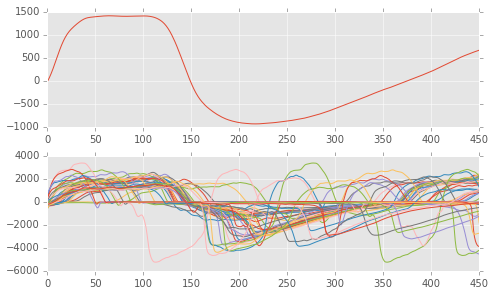

In [12]:
#plot all the baseline sniffs
snif_plot = plt.figure()
all_ax = snif_plot.add_axes([0, 0, 1, .4])
avg_ax = snif_plot.add_axes([0, .5, 1, .4])

t=np.arange(0, 450, 1)
avg_line = avg_ax.plot(np.average(-sniff_flow[:,:],axis=1))
lines=all_ax.plot(-sniff_flow[:,:50])


In [26]:
#load the sniff raster file
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_004_004_spikesBase.mat')
print sio.whosmat(mat_file)
base_data = sio.loadmat(mat_file,struct_as_record=False)


spikesBase = base_data['spikesBase']

print spikesBase[0][0].spikes.shape

num_trials = spikesBase.shape[1]
print 'numtrials ' + str(num_trials)
num_tpoints = spikesBase[0][0].spikes.shape[1]

print 'numpoints ' + str(num_tpoints)

sr_spikes = np.array(spikesBase[0][0].spikes, dtype=np.float32)
sr_t0     = np.array(spikesBase[0][0].t0, dtype = np.float32)
                    
print spikesBase[0][0].cellId
print spikesBase[0].shape

print sr_spikes.dtype

[('spikesBase', (1, 1), 'struct')]
(7813, 451)
numtrials 1
numpoints 451
[u'ZKawakeM72_004_c_004']
(1,)
float32


AssertionError: 

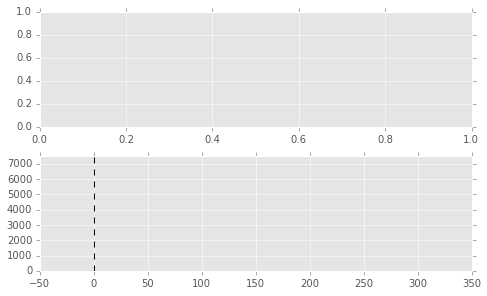

In [20]:
#plot all the baseline sniffs
sr_plot = plt.figure()
ras_ax  = sr_plot.add_axes([0, 0, 1, .4])
hist_ax = sr_plot.add_axes([0, .5, 1, .4])
bin_size=10

#plot the raster
lines,_ = plot_raster(sr_spikes,t0=500,ax=ras_ax)
ras_ax.set_xlim(-50,350)

#the psth
hist_line, hist_ax = plot_raster(sr_spikes,t0=500, t1=500, bin_size=10, ax=hist_ax)
##hist_ax.set_ylim(



[None, None]

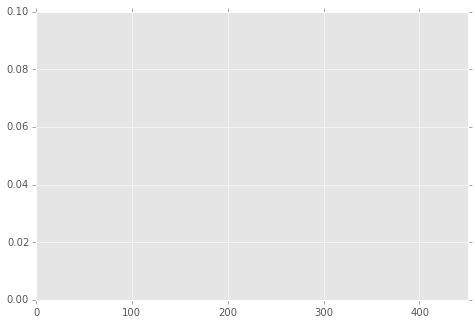

In [23]:
rast, xr = plot_raster(sr_spikes,t0=0, t1=0, bin_size=0)
xr.set_ylim(0,0.1)
plt.setp(rast, color ='r',linewidth = 2.0)

In [21]:
sr_spikes

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)

In [38]:
x = np.arange(3,dtype=float)
y = np.ones(3,dtype=float)
z=x[:,np.newaxis] + y[np.newaxis,:]
z[1,1]=np.nan
print z
np.nanmean(z,axis=0)

[[  1.   1.   1.]
 [  2.  nan   2.]
 [  3.   3.   3.]]


array([ 2.,  2.,  2.])

[[ nan  nan  nan  nan]
 [ nan   1.   1.  nan]
 [ nan   1.  nan  nan]]


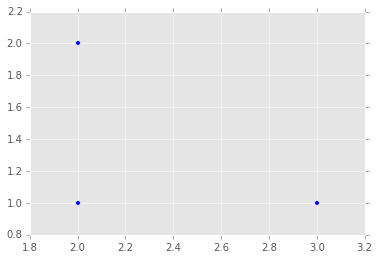

In [97]:
rows=np.arange(3)
cols=np.ones(4)
rm = rows[:,np.newaxis] + cols[np.newaxis,:]  
sp = np.zeros(rm.shape)
t= np.arange(4)

sp[1,2]=1
sp[1,1]=1
sp[2,1]=1
nsp = sp[:] == 0
sp[nsp]=np.NAN
print sp
plt.scatter(sp*rm,t*sp,)
plt.show()

In [90]:
rm*sp

array([[ nan,  nan,  nan,  nan],
       [ nan,   2.,   2.,  nan],
       [ nan,   3.,  nan,  nan]])

In [93]:
t*sp

array([[ nan,  nan,  nan,  nan],
       [ nan,   1.,   2.,  nan],
       [ nan,   1.,  nan,  nan]])